## 第1章 章末問題


### 問1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cis


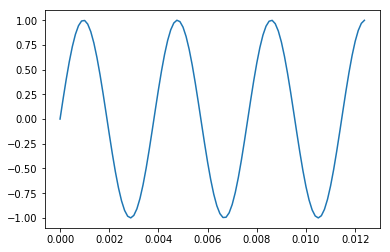

In [2]:
def curve(a, f, fs=8000, sec=1):
    """
    sec: サンプリング秒数
    """
    r = np.arange(0,sec,1/fs)
    return a*np.sin(2*np.pi*f*r),r

# (1)
fs = 8000
a = 1
f1 = 262
y1,range1 = curve(a,f1,sec=0.5)

plt.plot(range1[:100], y1[:100])
plt.show()
cis.audioplay(y1, fs)

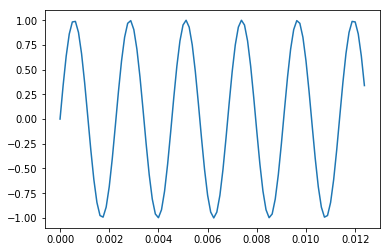

In [3]:
# (2)
a = 1
f2=440
y2,range2 = curve(a,f2,sec=2)
plt.plot(range2[:100], y2[:100])
plt.show()
cis.audioplay(y2, fs)

### 問2

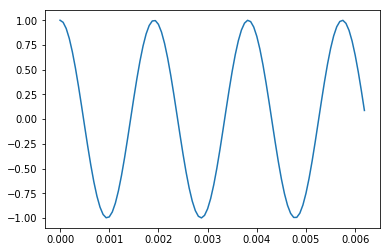

In [4]:
fs = 16*(10**3)
f = 523
a = 1
tm = np.arange(0,1,1/fs)

y= a*np.cos(2*np.pi*f*tm)
plt.plot(tm[:100], y[:100])
plt.show()
cis.audioplay(y,fs)

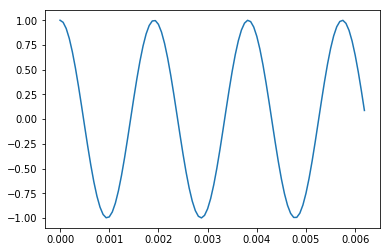

In [5]:
# sinで表現した場合
y2 = a*np.sin((2*np.pi)*f*tm - 0.5*np.pi)
plt.plot(tm[:100], y[:100])
plt.show()
cis.audioplay(y2, fs)

### 問3

#### (1)
出力するサンプリング点数は, サンプリング周波数 $fs$ なので $0.05*fs$ サンプリング回数 となる.

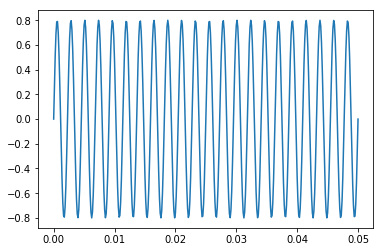

In [6]:
sec = 0.05
fs = 8000
t = np.arange(0, 1, 1/fs)
a = 0.8
f = 440
y = a*np.sin(2*np.pi*f*t)

idx = int(sec*fs)+1
cis.audioplay(y[:idx], fs)
plt.plot(t[:idx], y[:idx])
plt.show()

#### (2)
1周期は $1/f$ 秒 なので, これのサンプリング点数は $1/f*fs$ で求まる.

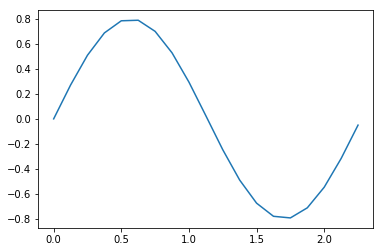

In [7]:
idx = int(1/f*fs)+1
plt.plot(t[:idx]*1000, y[:idx])
plt.show()

### 問4

周波数が近ければ近いほどうねりが強く聞こえる, 周波数が離れるにつれて別々の音と認識できるようになりうねりを感じにくくなる.

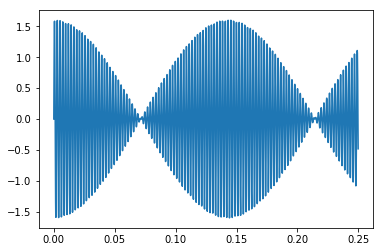

In [8]:
a = 0.8
f1 = 435
f2 = 442

y438,range1 = curve(a,f1)
y442,range2 = curve(a,f2)
yy = y438+y442
cis.audioplay(yy, fs)

plt_size = 2000
plt.plot(t[:plt_size], yy[:plt_size])
plt.show()

### 問5

$$
\begin{align*}
a_{yy} &= 2a \\
f_a &= (f_1+f_2)/2 \\
f_b &= (f_1-f_2)/2 \\
\end{align*}
$$


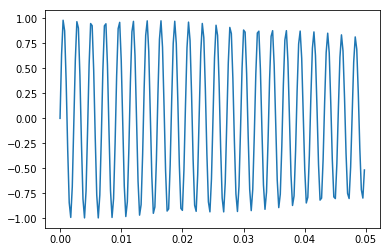

In [9]:
a_yy = 1 # a=0.5 とした
f_1= 438
f_2 = 442
f_a = (f_1+f_2)/2
f_b = (f_1-f_2)/2
fs = 4000
t = np.arange(0,1,1/fs)

yy = a_yy*np.cos(2*np.pi*f_b*t)*np.sin(2*np.pi*f_a*t)
plt.plot(t[:200],yy[:200])

### 問６

In [10]:
y = yy
ymax= np.abs(y).max()
y=y/(ymax*1.01)
cis.wavwrite('test.wav',y,fs)

### 問７

In [11]:
a = 0.8
fs = 8000

f_do =261.626
t_do= np.arange(0,0.75, 1/fs)
do = a*np.sin(2*np.pi*f_do*t_do) # do

f_re =293.665
t_re= np.arange(0,0.25, 1/fs)
re = a*np.sin(2*np.pi*f_re*t_re) # re

pau=np.arange(0,0.25, 1/fs) * 0

f_mi =329.628
t_mi= np.arange(0,0.75, 1/fs)
mi = a*np.sin(2*np.pi*f_mi*t_mi) # mi

y = np.hstack([do,re,pau,mi])

cis.audioplay(y,fs)

### 問９

In [12]:
v, fs = cis.wavread('/root/book_files/audio/vibra8.wav')
t = np.arange(0, 1, 1/fs)
f = 440
a = 0.1

# tのサイズをvに合わせる
len_t = v.shape[0]/fs
t = np.arange(0, len_t, 1/fs)

print(np.shape(v), t.shape)

# t = np.arange()

(26000,) (26000,)


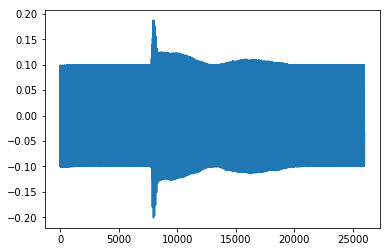

In [13]:
ysin = a*np.sin(2*np.pi*f*t)
# vmin = v[7000:15000]+ysin
vmin = v+ysin
cis.audioplay(vmin, fs)
plt.plot(vmin)
plt.show()


## 参考文献

『音階周波数』 http://tomari.org/main/java/oto.html